# **Eye Cancer Patients  Jupyter Notebook**

**Section**: S20 <br>

**Group**: pandas Salle

# **Dataset Description**

The chosen data set titled "Eye Cancer Patient Records" provides detailed medical records for 5,000 patients diagnosed with 3 different types of eye cancer namely, Melanoma, Retinoblastoma, and Lymphoma. The dataset was retrieved from Kaggle and is designed for machine learning projects, statistical modeling, and healthcare research.


### **Import the necessary libraries**

For Data Visualization and Data processing


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Initializing the DataFrame**

Load the Eye Cancer Patients Dataset into a pandas DataFrame


In [25]:
eye_cancer_df = pd.read_csv('eye_cancer_patients.csv')
eye_cancer_df.head()

,Patient_ID,Age,Gender,Cancer_Type,Laterality,Date_of_Diagnosis,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Radiation_Therapy,Chemotherapy,Outcome_Status,Survival_Time_Months,Genetic_Markers,Family_History,Country
0,PID00001,58,F,Retinoblastoma,Left,2019-01-25,Stage IV,Radiation,False,15,3,Deceased,85,NaN,True,UK
1,PID00002,15,Other,Retinoblastoma,Right,2021-10-21,Stage III,Chemotherapy,True,69,6,In Remission,10,NaN,True,Japan
2,PID00003,64,M,Retinoblastoma,Bilateral,2021-03-12,Stage IV,Surgery,False,47,6,In Remission,3,BRAF Mutation,False,UK
3,PID00004,33,M,Melanoma,Right,2021-05-10,Stage II,Radiation,True,36,6,Active,40,NaN,False,Canada
4,PID00005,8,Other,Lymphoma,Left,2019-11-24,Stage I,Chemotherapy,False,14,14,In Remission,26,BRAF Mutation,True,USA


### **Preparing to Clean up the Data**

Check the information regarding the Dataset


In [4]:
eye_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Age                   5000 non-null   int64 
 2   Gender                5000 non-null   object
 3   Cancer_Type           5000 non-null   object
 4   Laterality            5000 non-null   object
 5   Date_of_Diagnosis     5000 non-null   object
 6   Stage_at_Diagnosis    5000 non-null   object
 7   Treatment_Type        5000 non-null   object
 8   Surgery_Status        5000 non-null   bool  
 9   Radiation_Therapy     5000 non-null   int64 
 10  Chemotherapy          5000 non-null   int64 
 11  Outcome_Status        5000 non-null   object
 12  Survival_Time_Months  5000 non-null   int64 
 13  Genetic_Markers       2503 non-null   object
 14  Family_History        5000 non-null   bool  
 15  Country               5000 non-null   

#### **Data preprocessing**
We will want to remove the `nan` values so that when we do Exploratory Data Analysis later, we will not encounter isues<br>
First let us check if we missed any variables with a `nan` value

In [5]:
nan_variables = eye_cancer_df.columns[eye_cancer_df.isnull().any()].to_list()
print(nan_variables)

['Genetic_Markers']


> For this dataset, it seems like `Genetic_Markers` is the only variable that has a `nan` value, so we may proceed with the cleaning up of the data.

#### **Do we drop or replace the** `nan` **values from** `Genetic_Markers` **variable?**
Dropping the rows with `nan` values in `Genetic_Markers` would be more convenient, but first let us check if we still have sufficient data if ever we drop them<br>
So our task is to count how many of the rows are affected by the `nan` values.

In [6]:
nan_count = Genetic_df.isnull().sum()

print("The count of NaN values in Genetic_Markers is:", nan_count)

NameError: name 'Genetic_df' is not defined

> Let us check the shape of our pandas DataFrame: `eye_cancer_df` 

In [7]:
eye_cancer_df.shape
print("Our Data frame has {} rows and {} columns.".format(eye_cancer_df.shape[0], eye_cancer_df.shape[1]))

Our Data frame has 5000 rows and 16 columns.


> We know we have 5000 observations, and according to the count of our `nan` values in the `Genetic_Markers` variable, 2497 rows are affected by these `nan` values. <br> <br>
> Therefore, we cannot proceed with the dropping since it will affect about half of our observations. <br> <br>
> Instead let us, replace these `nan` values with another categorical data as `None`.

In [8]:
eye_cancer_df.loc[eye_cancer_df['Genetic_Markers'].isnull(), 'Genetic_Markers'] = 'None'

#### ⚠️ **Sanity Check !!**
Let us see if the `nan` values in the `Genetic_Markers` variables have been replace with `None`

In [9]:
replaced = eye_cancer_df.loc[eye_cancer_df['Genetic_Markers'] == 'None', 'Genetic_Markers'].shape[0]
not_replaced = eye_cancer_df['Genetic_Markers'].isnull().sum()
print("The number of rows where the nan values in Genetic_Markers variable that has been replaced with 'None' is: {} rows".format(replaced))
print("Meanwhile the number of rows that are still containg nan values is: {} rows".format(not_replaced))

The number of rows where the nan values in Genetic_Markers variable that has been replaced with 'None' is: 2497 rows
Meanwhile the number of rows that are still containg nan values is: 0 rows


The `2497` rows that has been successfully replaced with `None` in the `Genetic_Markers` variable is parallel with the number of rows that was originally `nan` values in `Genetic_Markers`

#### **Next let's check if there are duplicate values in our categorical data**
To do this we can loop over the columns of our pandas DataFrame and then check the Unique Values

In [10]:
for col in eye_cancer_df.columns:
    if eye_cancer_df[col].dtype == 'object' and col != 'Date_of_Diagnosis' and col != 'Patient_ID':
        print(f"Unique values in {col}: {eye_cancer_df[col].unique()}")
        print()

Unique values in Gender: ['F' 'Other' 'M']

Unique values in Cancer_Type: ['Retinoblastoma' 'Melanoma' 'Lymphoma']

Unique values in Laterality: ['Left' 'Right' 'Bilateral']

Unique values in Stage_at_Diagnosis: ['Stage IV' 'Stage III' 'Stage II' 'Stage I']

Unique values in Treatment_Type: ['Radiation' 'Chemotherapy' 'Surgery']

Unique values in Outcome_Status: ['Deceased' 'In Remission' 'Active']

Unique values in Genetic_Markers: ['None' 'BRAF Mutation']

Unique values in Country: ['UK' 'Japan' 'Canada' 'USA' 'Australia' 'Germany' 'South Africa' 'Brazil'
 'France' 'India']



> Since there are no duplicate values

In [11]:
eye_cancer_df = eye_cancer_df.drop(['Age', 'Laterality', 'Date_of_Diagnosis', 'Stage_at_Diagnosis', 'Surgery_Status', 
                                             'Radiation_Therapy', 'Chemotherapy', 'Country'], axis=1)
eye_cancer_df = eye_cancer_df.drop_duplicates()
eye_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Gender                5000 non-null   object
 2   Cancer_Type           5000 non-null   object
 3   Treatment_Type        5000 non-null   object
 4   Outcome_Status        5000 non-null   object
 5   Survival_Time_Months  5000 non-null   int64 
 6   Genetic_Markers       5000 non-null   object
 7   Family_History        5000 non-null   bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 278.4+ KB


In [12]:
eye_cancer_df['Gender'] = eye_cancer_df['Gender'].str.strip()
eye_cancer_df['Cancer_Type'] = eye_cancer_df['Cancer_Type'].str.strip()
eye_cancer_df['Treatment_Type'] = eye_cancer_df['Treatment_Type'].str.strip()
eye_cancer_df['Outcome_Status'] = eye_cancer_df['Outcome_Status'].str.strip()
eye_cancer_df['Genetic_Markers'] = eye_cancer_df['Genetic_Markers'].str.strip()

In [13]:
eye_cancer_df.info()
eye_cancer_df.describe()
eye_cancer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Gender                5000 non-null   object
 2   Cancer_Type           5000 non-null   object
 3   Treatment_Type        5000 non-null   object
 4   Outcome_Status        5000 non-null   object
 5   Survival_Time_Months  5000 non-null   int64 
 6   Genetic_Markers       5000 non-null   object
 7   Family_History        5000 non-null   bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 278.4+ KB


,Patient_ID,Gender,Cancer_Type,Treatment_Type,Outcome_Status,Survival_Time_Months,Genetic_Markers,Family_History
0,PID00001,F,Retinoblastoma,Radiation,Deceased,85,None,True
1,PID00002,Other,Retinoblastoma,Chemotherapy,In Remission,10,None,True
2,PID00003,M,Retinoblastoma,Surgery,In Remission,3,BRAF Mutation,False
3,PID00004,M,Melanoma,Radiation,Active,40,None,False
4,PID00005,Other,Lymphoma,Chemotherapy,In Remission,26,BRAF Mutation,True


# Test

#### **EDA Question 1: How does survival time vary by cancer type?**

To visualize if survival time varies with the cancer type, let's use the box plot which will give us the median, upper and lower whiskers, and Q1 and Q3.

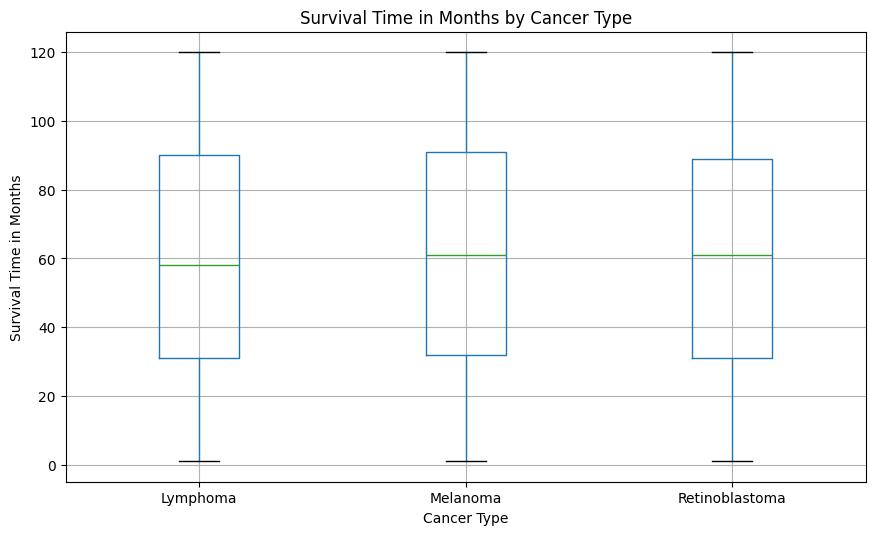

In [15]:
eye_cancer_df.boxplot(column='Survival_Time_Months', by='Cancer_Type', figsize=(10, 6))
plt.title('Survival Time in Months by Cancer Type')
plt.suptitle('')
plt.xlabel('Cancer Type')
plt.ylabel('Survival Time in Months')
plt.show()

In [19]:
eye_cancer_df.groupby("Cancer_Type")["Survival_Time_Months"].describe()

,count,mean,std,min,25%,50%,75%,max
Cancer_Type,,,,,,,,
Lymphoma,1637.0,60.373855,34.457862,1.0,31.0,58.0,90.0,120.0
Melanoma,1691.0,60.998226,34.640188,1.0,32.0,61.0,91.0,120.0
Retinoblastoma,1672.0,60.765550,34.565890,1.0,31.0,61.0,89.0,120.0


From the graph and table, we can see that the survival time in months of each cancer type is very similar to one another. This suggests that the cancer type may not be a strong predictor on its own with regards to the survival time.

#### **EDA Question 1: How does survival time vary between patients with and without the BRAF mutation**


KeyError: 'Columns not found: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120'

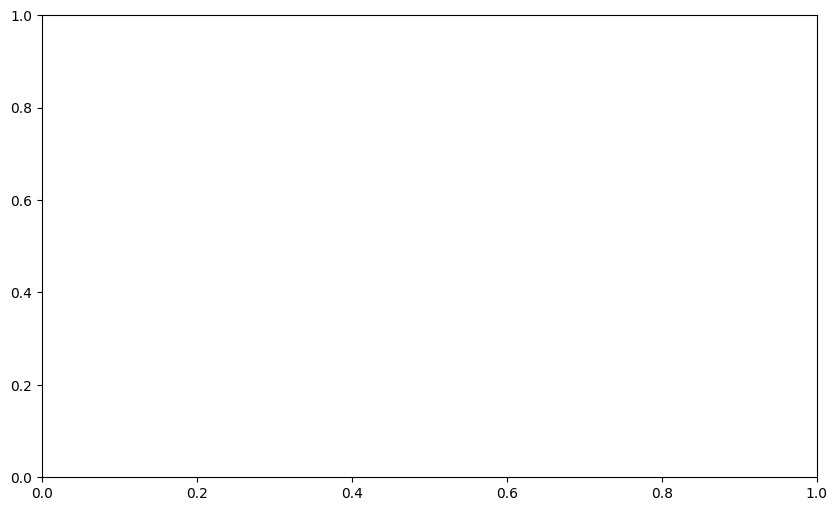

In [ ]:
eye_cancer_df.boxplot(column='Survival_Time_Months', by='Genetic_Mark', figsize=(10, 6))
plt.title('Survival Time in Months by Cancer Type')
plt.suptitle('')
plt.xlabel('Cancer Type')
plt.ylabel('Survival Time in Months')
plt.show()

In [ ]:
eye_cancer_df.boxplot(column='Survival_Time_Months', by='Stage', figsize=(10, 6))


In [29]:
eye_cancer_df['Cancer_Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Cancer_Type
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB
